En esta lección crearemos un mini proyecto utilizando el algoritmo de regresión lineal, aplicando todo el proceso real de machine learning.

In [1]:
#importar librerias
import pandas as pd
import seaborn as sms
import numpy as np
from sklearn.linear_model import LinearRegression

In [24]:
# leer archivo csv
data = pd.read_csv("data/U4_01_housing.csv")
data_na = data.dropna()
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Axes: xlabel='median_house_value', ylabel='median_income'>

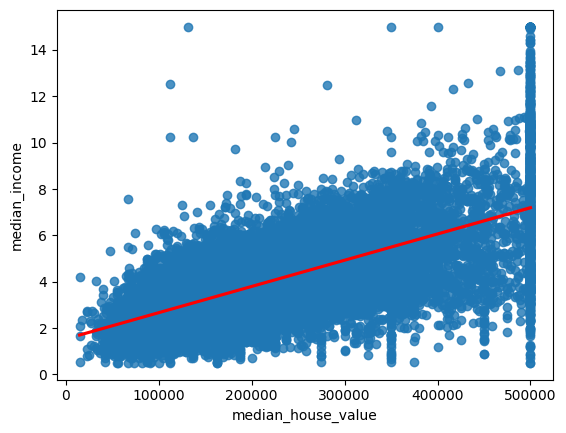

In [25]:
#crear grafica de regresion lineal
sms.regplot(x=data_na['median_house_value'], y=data_na['median_income'], line_kws={"color": "red"})

In [26]:
#como los modelos de algoritmos solo se entrenan con numeros la columna ocean_proximity puede afectar
#el entrenamiento de nuestro modelo, por eso lo que haremos sera convertir estos datos a datos numericos y utlizaremos el siguiente concepto
# por cada valor de la fila asinaremos un 1 y a los demas 0

#ejemplo

#Dummies / One Hot Coding 
# INLAND   NEAR BAY    NEAR OCEAN 
#  1         0            0 
#  0         1            0
#  0         0            1

#esto lo hacemos de la siguiente forma con pandas
dummies = pd.get_dummies(data["ocean_proximity"], dtype=int)
dummies


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [27]:
#insertamos el nuevo arreglo de datos con a nuestro set de datos
data_na = data_na.join(dummies)
data_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [31]:
#eliminamos la columna que tiene los datos que no son numericos
data_na = data_na.drop(["ocean_proximity"], axis=1)
data_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [36]:
#separar datos de caracteristicas
X = data_na.drop(['median_house_value'], axis=1)
y = data_na['median_house_value']

y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [42]:
#Separar los datos en dos partes cojuntos de datos y de pruebas
from sklearn.model_selection import train_test_split
x_ent, x_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [45]:
#crear modelo de regresion lineal y entrenarlo
model = LinearRegression()
model.fit(x_ent, y_ent)

LinearRegression()

In [47]:
model.score(x_ent, y_ent)

0.6478512677163604

In [49]:
predicts = model.predict(x_pru)
comparative = {"Comparativa": predicts, "Valor Real": y_pru}
pd.DataFrame(comparative)

,Comparativa,Valor Real
8445,301496.571113,303700.0
15345,156390.705674,103300.0
20465,268437.455291,188000.0
14796,164418.787754,127600.0
2710,92546.294417,93800.0
...,...,...
10836,272025.197952,264200.0
3123,131534.016241,86500.0
858,206270.117983,191700.0
13945,280825.021293,230900.0


cuando el modelo funciona muy bien con los datos de entrenamiento pero funciona mal con los datos de prueba se le llama sobreajuste o overfitting

In [50]:
#overfitting sobreajuste
print(model.score(x_ent, y_ent))
print(model.score(x_pru, y_pru))


0.6478512677163604
0.639264362516056
